In [36]:
#Social_Network_Ads.csv

**Importing the libraries**

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import RocCurveDisplay


**Importing the dataset**

In [39]:
df=pd.read_csv("/content/drive/MyDrive/Copy of Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Feature Scaling**

In [40]:
x=df.drop(["User ID","Purchased"],axis=1)
y=df.Purchased

In [41]:
le=LabelEncoder()
x["Gender"]=le.fit_transform(x["Gender"])


In [42]:
sl=StandardScaler()
x=sl.fit_transform(x)

**Splitting the dataset into the Training set and Test set**

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=36)

**Fitting Decision Tree Classification to the Training set**

In [44]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [45]:
y_pred=dc.predict(x_test)
dc.score(x_test,y_test)

0.93

**Making the Confusion Matrix**

In [46]:
con=confusion_matrix(y_test,y_pred)
con

array([[59,  3],
       [ 4, 34]])

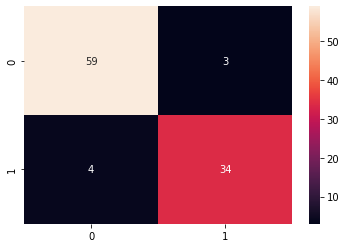

In [47]:
sn.heatmap(con,annot=True)

**Visualising the Training set results**

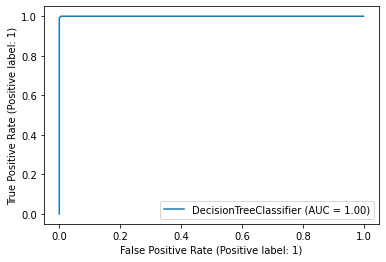

In [48]:
RocCurveDisplay.from_estimator(dc,x_train,y_train)

**Visualising the Test set results**

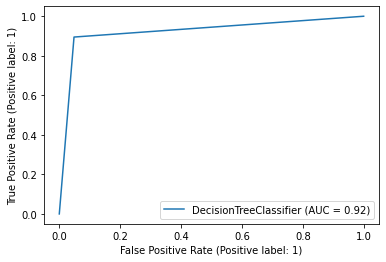

In [49]:
RocCurveDisplay.from_estimator(dc,x_test,y_test)